In [10]:
import _pickle as pickle
import matplotlib.pyplot as plt
import numpy as np
import os
import seaborn as sns

from tqdm.notebook import tqdm

In [11]:
result_dir = "/Users/chanb/research/ualberta/Avg_OPE/cc_results/results/disc_cop"
env_name = "halfcheetah"

In [12]:
baseline = pickle.load(open(os.path.join(result_dir, "baseline-{}.pkl".format(env_name)), "rb"))

all_runs = []
all_errors = []
for run_file in tqdm(os.listdir(os.path.join(result_dir, env_name))):
    run_data = pickle.load(open(os.path.join(result_dir, env_name, run_file), "rb"))

    all_runs.append(run_file.split(".pkl")[0])
    all_errors.append([])

    for seed in run_data["seeds"]:
        all_errors[-1].append((np.array(run_data["results"][seed][1]) - baseline[seed][run_data["hyperparameters"]["discount"]][0]) ** 2)

  0%|          | 0/432 [00:00<?, ?it/s]

In [13]:
all_runs = np.array(all_runs)

In [14]:
all_errors = np.array(all_errors)

In [15]:
mse_per_run = np.mean(all_errors, axis=(1, 2))

In [16]:
sort_idxes = np.argsort(mse_per_run)

In [17]:
mse_per_run[sort_idxes]

array([5.93278912e-01, 5.93278912e-01, 5.93278912e-01, 5.93278912e-01,
       5.93278912e-01, 5.93278912e-01, 5.93278912e-01, 5.93278912e-01,
       5.93278912e-01, 5.93278912e-01, 5.93278912e-01, 5.93278912e-01,
       5.93278912e-01, 5.93278912e-01, 5.93278912e-01, 5.93278912e-01,
       5.93278912e-01, 5.93278912e-01, 5.93278912e-01, 5.93278912e-01,
       5.93278912e-01, 5.93278912e-01, 5.93278912e-01, 5.93278912e-01,
       9.62027696e-01, 9.62027696e-01, 9.62027696e-01, 9.68676256e-01,
       9.68676256e-01, 9.68676256e-01, 9.82477437e-01, 9.82477437e-01,
       9.82477437e-01, 9.82540687e-01, 9.82540687e-01, 9.82540687e-01,
       9.86609228e-01, 9.86609228e-01, 9.86609228e-01, 9.90531945e-01,
       9.90531945e-01, 9.90531945e-01, 9.91180251e-01, 9.91180251e-01,
       9.91180251e-01, 9.94110103e-01, 9.94110103e-01, 9.94110103e-01,
       1.05810222e+00, 1.05810222e+00, 1.05810222e+00, 1.05810222e+00,
       1.05810222e+00, 1.05810222e+00, 1.05810222e+00, 1.05810222e+00,
      

mse-tune-random_weight_0.3-discount_factor_0.995-buffer_size_80-link_default-batch_size_512-bootstrap_target_target_network-lr_0.0001-alpha_0.0
mse-tune-random_weight_0.3-discount_factor_0.995-buffer_size_200-link_default-batch_size_256-bootstrap_target_target_network-lr_0.001-alpha_0.0
mse-tune-random_weight_0.3-discount_factor_0.995-buffer_size_200-link_default-batch_size_512-bootstrap_target_target_network-lr_0.001-alpha_0.0
mse-tune-random_weight_0.3-discount_factor_0.995-buffer_size_200-link_default-batch_size_256-bootstrap_target_target_network-lr_0.0005-alpha_0.0
mse-tune-random_weight_0.3-discount_factor_0.995-buffer_size_200-link_default-batch_size_512-bootstrap_target_target_network-lr_0.0005-alpha_0.0


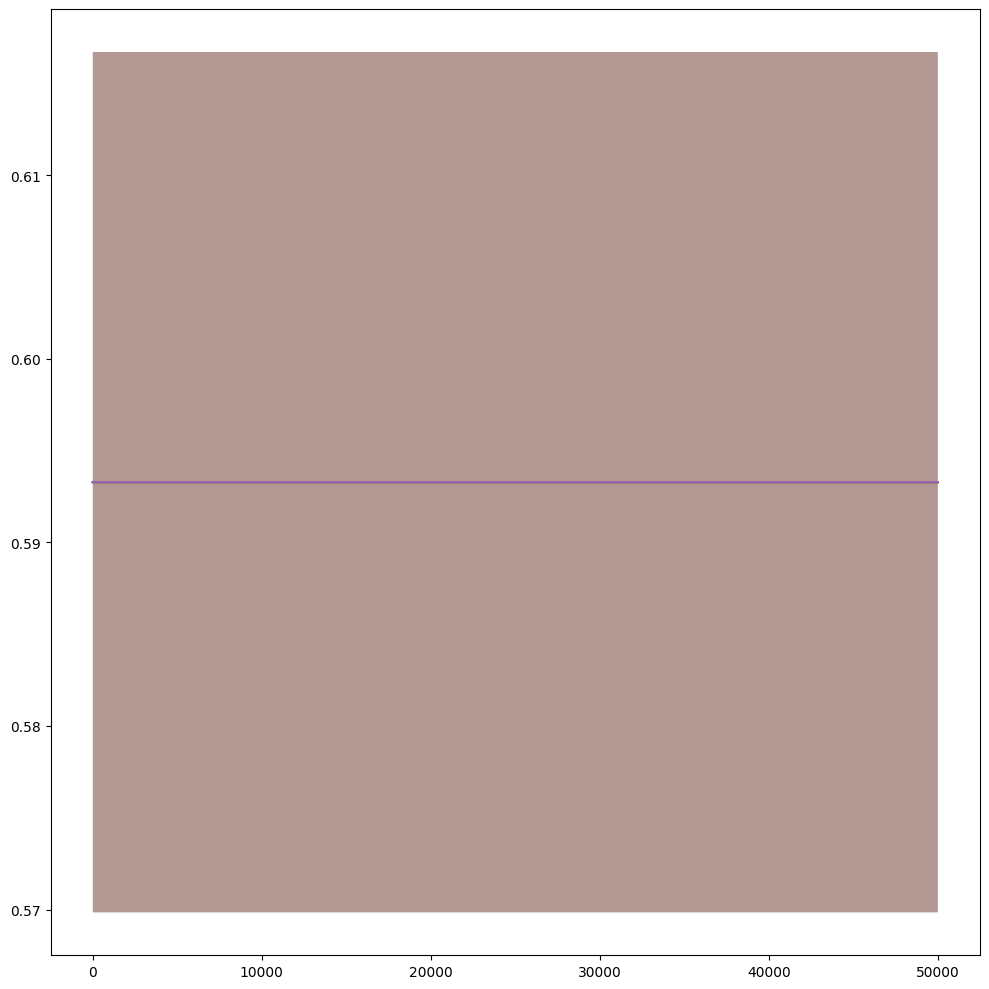

In [18]:
top_k = 5

fig, ax = plt.subplots(1, 1, figsize=(10, 10))
for run_name, errors in zip(all_runs[sort_idxes][:top_k], all_errors[sort_idxes][:top_k]):
    print(run_name)

    # log_errors = np.log10(errors)
    log_errors = (errors)
    mean_errors = np.mean(log_errors, axis=0)
    std_errors = np.std(log_errors, axis=0) / np.sqrt(len(log_errors))
    ax.plot(np.arange(errors.shape[1]), mean_errors)
    ax.fill_between(np.arange(errors.shape[1]), mean_errors + std_errors, mean_errors - std_errors, alpha=0.2)
fig.tight_layout()
plt.show()